# CP5  Aprendizaje de Máquinas
---
## El problema de clustering

En esta clase práctica, exploramos cómo funcionan *K-means*, *DBSCAN* y los algoritmos de clustering jerárquico. Además, mostramos varios problemas de *K-means* y brindamos soluciones para abordar esos problemas, incluido el análisis de calidad de clúster.

In [7]:
# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

### Ejercicio 1: Generación del dataset

In [8]:
# Generando datos.
# `random_state` es la semilla utilizada por el generador de números aleatorios (random number generator) para la reproducibilidad (default=None).
X, y = make_blobs(n_samples=5000,
                  n_features=2,
                  centers=3,
                  random_state=170)

Veamos nuestra matriz de características y el vector de clases:

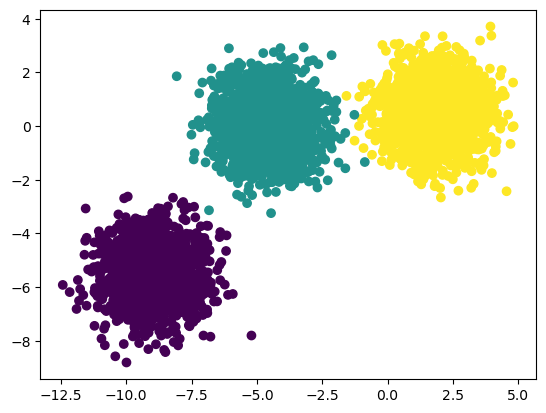

In [9]:
# Grafica la distribución de datos (_ground truth_) usando matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1], c=y)

### Ejercicio 2: Usando K-Means


#### El Algoritmo

El algoritmo de agrupamiento de [Κ-means](https://scikit-learn.org/stable/modules/clustering.html#k-means) utiliza un refinamiento iterativo para producir un resultado final. Las entradas del algoritmo son el número de grupos $Κ$ y el conjunto de datos. El conjunto de datos es una colección de características para cada punto de datos. Los algoritmos comienzan con estimaciones iniciales para los centroides $Κ$, que pueden generarse aleatoriamente o seleccionarse aleatoriamente del conjunto de datos. Luego, el algoritmo itera entre dos pasos:

**Paso de asignación de datos**: Cada centroide define uno de los clústeres. En este paso, cada punto de datos se asigna a su centroide más cercano, en función de la distancia euclidiana al cuadrado. Más formalmente, si $c_i$ es la colección de centroides en el conjunto $C$, entonces cada punto de datos $x$ se asigna a un grupo basado en

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$
donde dist( · ) es la distancia euclidiana estándar ($L_2$). Sea $S_i$ el conjunto de asignaciones de puntos de datos para cada i-ésimo centroide de los clusters.

**Paso de actualización del centroide**: en este paso, se vuelven a calcular los centroides. Esto se hace tomando la media de todos los puntos de datos asignados al grupo de ese centroide.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i }x_i$$

El algoritmo itera entre los pasos uno y dos hasta que se cumple un criterio de parada (es decir, ningún punto de datos cambia de grupo, la suma de las distancias se minimiza, se alcanza un número máximo de iteraciones o el desplazamiento de los centroides es menor que un umbral determinado).

**Convergencia e inicialización aleatoria**

El resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que evaluar más de una ejecución del algoritmo con centroides iniciales aleatorios puede dar un mejor resultado.

<img src=resources/K-means_convergence.gif style="width: 300px;"/>

Utilicemos K-means con nuestros datos:

In [10]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 113728.9994342094.
Iteration 1, inertia 49800.83444203239.
Iteration 2, inertia 49491.5429484619.
Iteration 3, inertia 49052.44820706852.
Iteration 4, inertia 47127.08278165686.
Iteration 5, inertia 38352.58250058121.
Iteration 6, inertia 15937.047786568877.
Iteration 7, inertia 9743.05323703543.
Iteration 8, inertia 9733.16763519945.
Converged at iteration 8: center shift 8.017874814662433e-06 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 37255.01567718294.
Iteration 1, inertia 10907.457687453942.
Iteration 2, inertia 9734.519892392898.
Converged at iteration 2: center shift 0.0007621900298187924 within tolerance 0.0014634111435935595.
Initialization complete
Iteration 0, inertia 45752.21565817258.
Iteration 1, inertia 43644.21904942107.
Iteration 2, inertia 43421.685035126255.
Iteration 3, inertia 43292.851160029364.
Iteration 4, inertia 43173.34885753339.
Iteration 5, inertia 42979.791016246185.
Iter

Para mostrar las predicciones se usa la función `labels_` que devuelve un vector con los clusters a los cuales pertenece cada instancia de entrenamiento.

In [11]:
# Mostrar predicciones
kmeans.labels_

array([2, 0, 0, ..., 2, 1, 1], dtype=int32)

Para encontrar los centroides se usa la función `cluster_centers_` que devuelve una matriz con los centroides de cada grupo.

In [12]:
# Mostrar centros de clusters (centroides)
kmeans.cluster_centers_

array([[ 1.89450492,  0.5009336 ],
       [-8.94710203, -5.51613184],
       [-4.55676387,  0.04603707]])

Grafiquemos las predicciones:

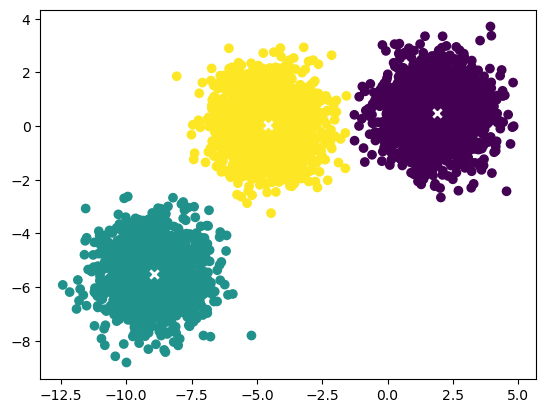

In [13]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

Podemos hacer nuevas predicciones sin volver a ejecutar kmeans (simplemente encuentra los centroides más cercanos ya computados para un nuevo conjunto de datos).

In [14]:
# Nuevo conjunto de datos
X_new = np.array([[10,10], [-10, -10], [-5, 10]])

In [15]:
# El código siguiente es equivalente a:
# y_pred = KMeans(...).fit_predict(X), pero esto necesita realizar `fit` nuevamente.

y_pred = kmeans.predict(X_new)
y_pred

array([0, 1, 2], dtype=int32)

Podemos obtener distancias desde el punto de datos hasta cada centroide.

In [16]:
# El siguiente código es equivalente a:
# from sklearn.metrics.pairwise import euclidean_distances
# euclidean_distances(X_new, kmeans.cluster_centers_)

kmeans.transform(X_new)

array([[12.48724601, 24.48965134, 17.63464636],
       [15.86659553,  4.60582976, 11.42592142],
       [11.73739582, 16.01030799,  9.96382639]])

### Ejercicio 3: Problemas de K-means

#### Problema 1: Necesita elegir un número correcto de clústeres

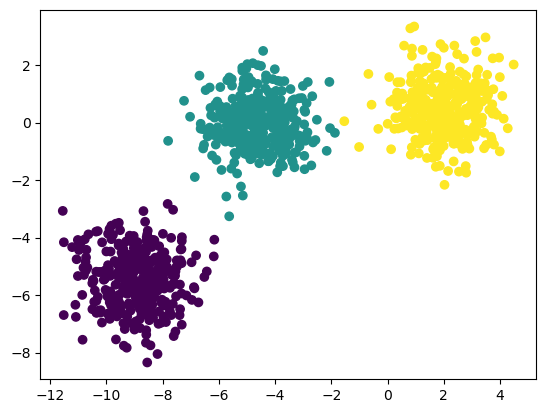

In [17]:
# Generar los datos.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=170)

# Graficar la distribución.
plt.scatter(X[:,0], X[:,1], c=y)

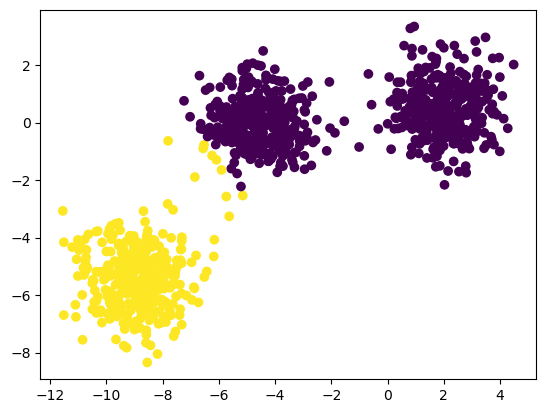

In [18]:
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Graficar las predicciones.
plt.scatter(X[:,0], X[:,1], c=y_pred)

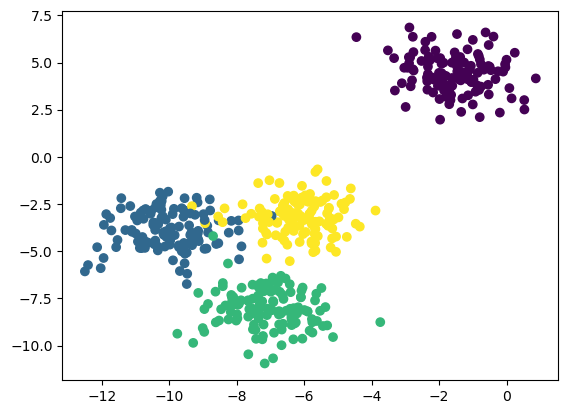

In [19]:
# Generar los datos.
# Esta configuración particular tiene un grupo distinto y 3 grupos colocados muy juntos.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Graficar la distribución de los datos.
plt.scatter(X[:,0], X[:,1], c = y)

#### Solución: medir la calidad de los clusters para determinar el número de clusters óptimo


##### Método supervisado
*Homogeneidad*: cada grupo contiene solo miembros de una sola clase.

*Integridad*: Todos los miembros de una clase determinada se asignan al mismo grupo.

##### Método no supervisado

**Coeficiente de Silhouette** (*Silhouette  Coefficient*): Evalua qué tan bien están la **compacidad** y la **separación** de los clusters.
(Tenga en cuenta que la notación a continuación es consistente con el contenido anterior). Usando *Coeficiente de Silhouette*, podemos elegir un valor óptimo para el número de grupos.

***

$ a(x_i) $ denota la **distancia media dentro del grupo**. Evalua la compacidad del clúster al que pertenece $x_i$. (Cuanto más pequeño, más compacto)

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$

Para el punto de datos $x_i$, calcule su distancia promedio a todos los demás puntos de datos en su grupo. (Menos uno en la parte del denominador es omitir el punto de datos actual $x_i$)

***

$ b(x_i) $ denota la **distancia media del cluster más cercano**. Evalua cómo se separa $x_i$ de otros clústeres. (Cuanto más grande más separados)

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

Para el punto de datos $x_i$ y todos los demás grupos que no contienen $x_i$, calcule su distancia promedio a todos los demás puntos de datos en los grupos dados. Encuentre el valor de distancia mínima con respecto a los grupos dados.

***

Finalmente, *Coeficiente de Silhouette*:  $s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $. Se quiere $a(x_i) \lt b(x_i)$ y $a(x_i) \to 0$ así como $s(x_i) \to 1$.

Los *Coeficiente de Silhouette* cercanos a +1 indican que la muestra está lejos de los clusters vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos clusters vecinos y los valores negativos indican que esas muestras pueden haber sido asignadas al cluster equivocado.

Ahora, determinemos la cantidad de clusters óptimos basado en la homogeneidad, la integridad de los clusters y el Coeficiente de Silhouette . Para ello, se usan las funciones `metrics.homogeneity_score(y, y_pred)` y `metrics.completeness_score(y, y_pred)` para calcular los coeficientes de homogeneidad e integridad. La función `metrics.silhouette_samples(X, y_pred)` calcula el Coeficiente de Sihouette para cada punto de datos y `metrics.silhouette_score(X, y_pred)` calcula el Coeficiente de Sihouette medio de todos los puntos de datos.

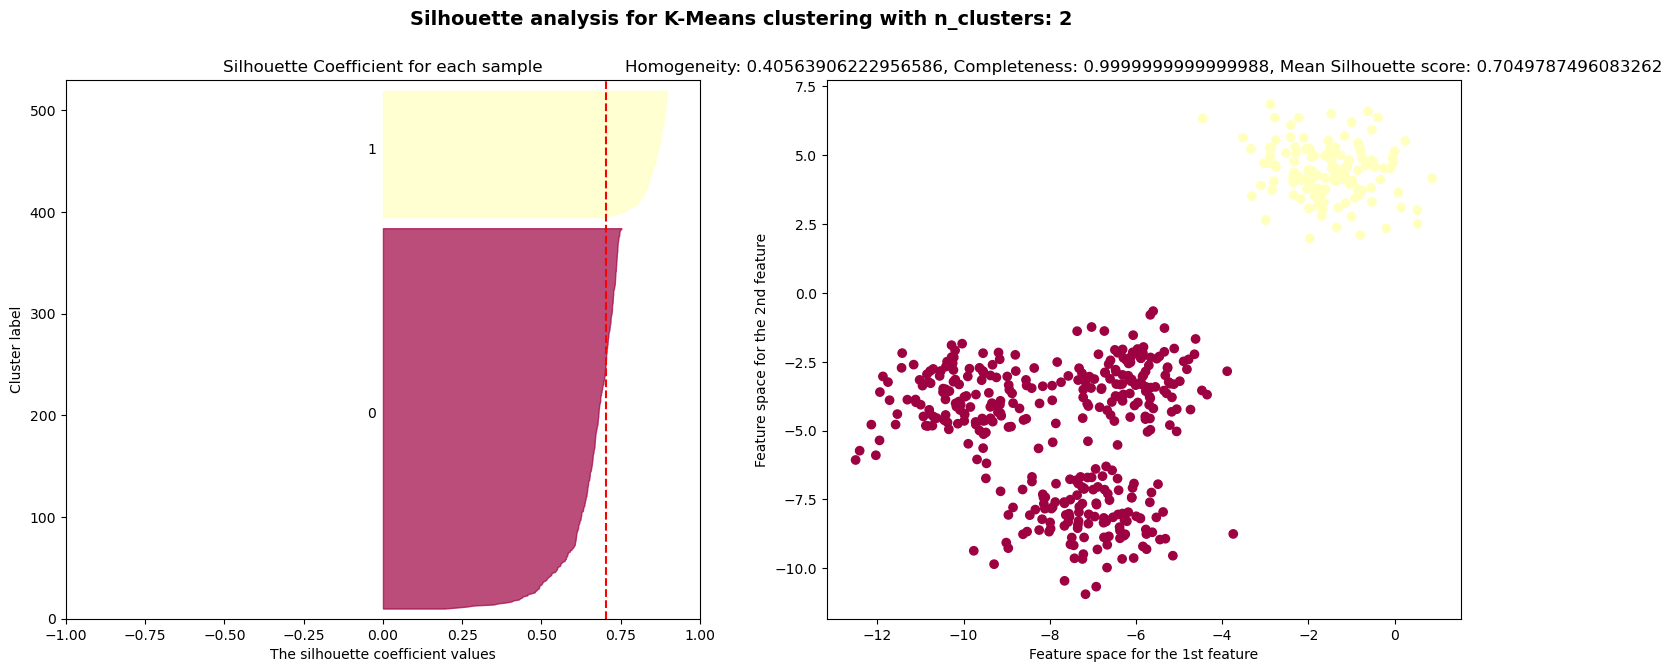

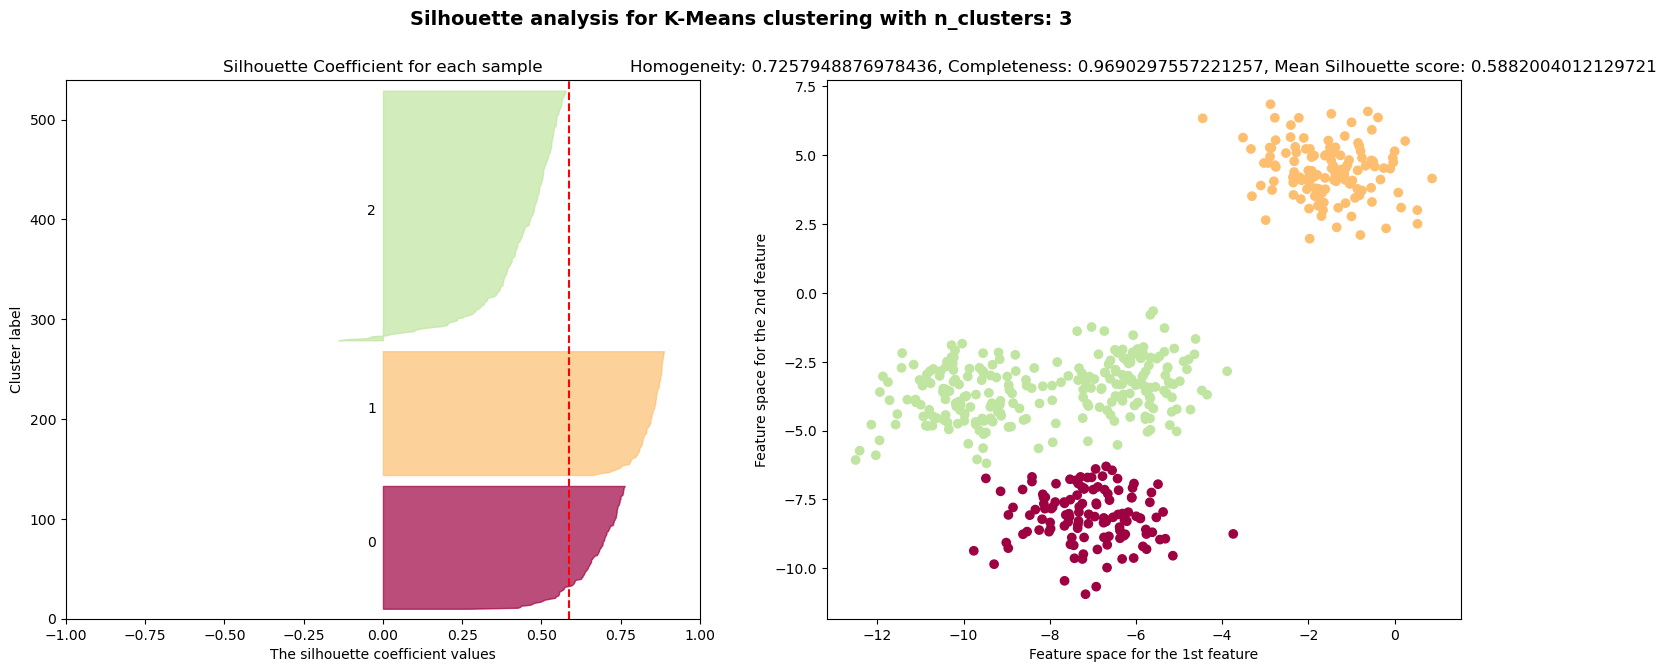

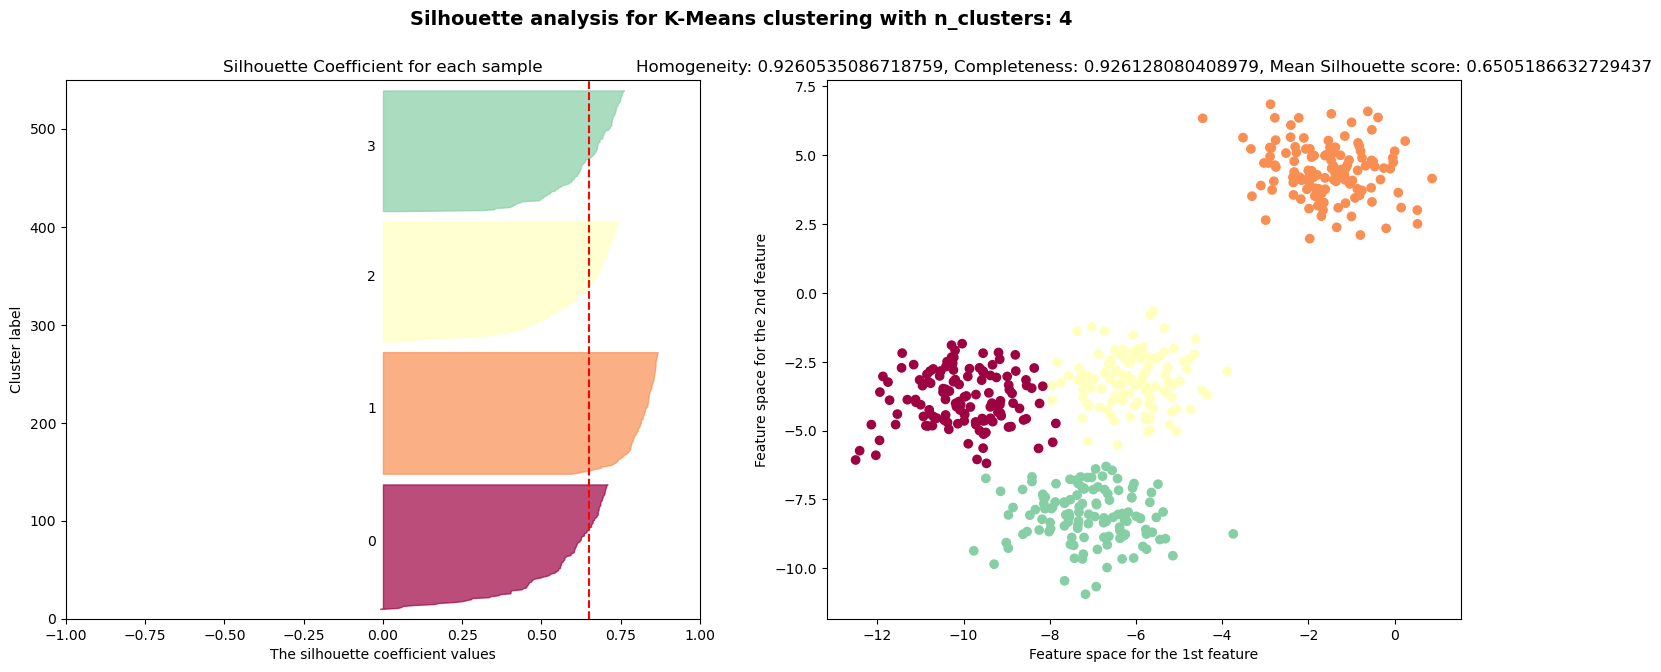

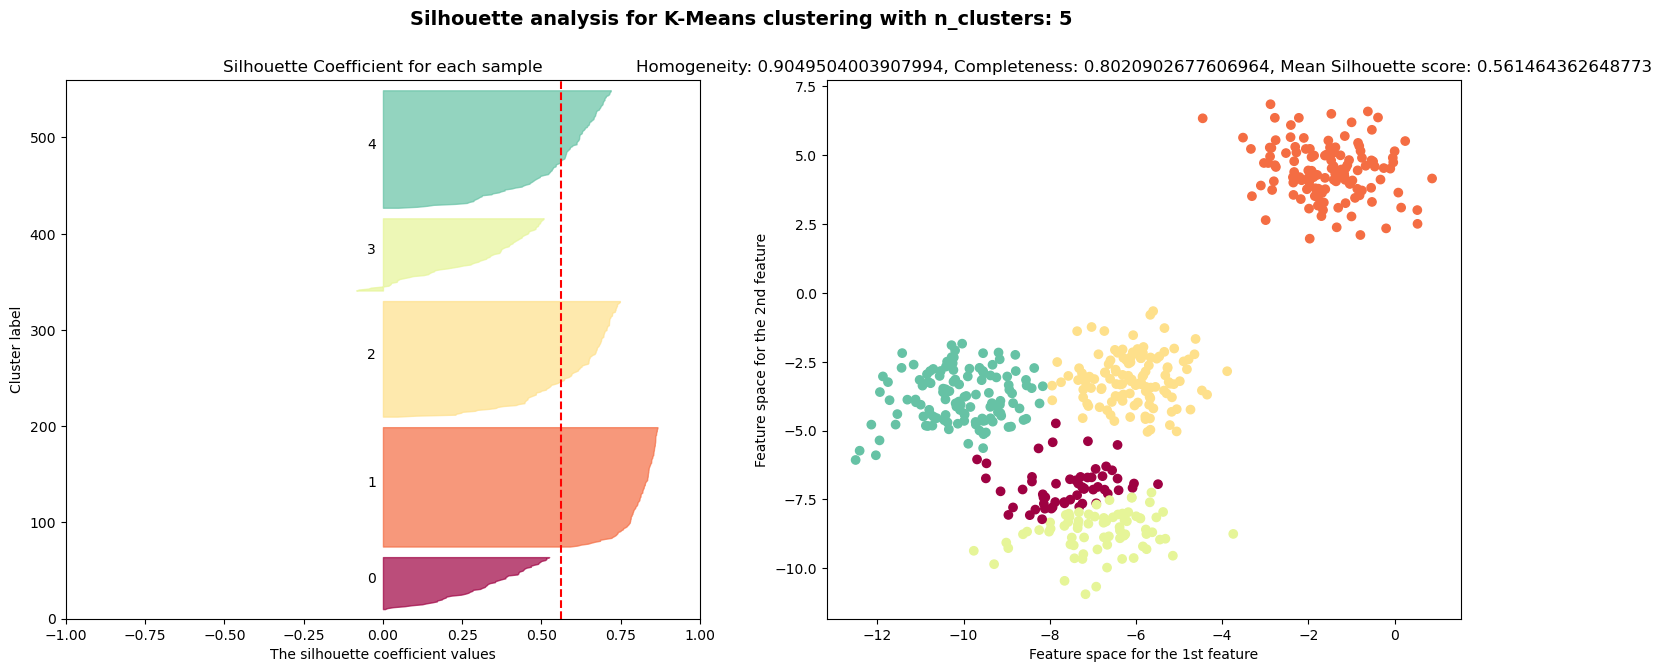

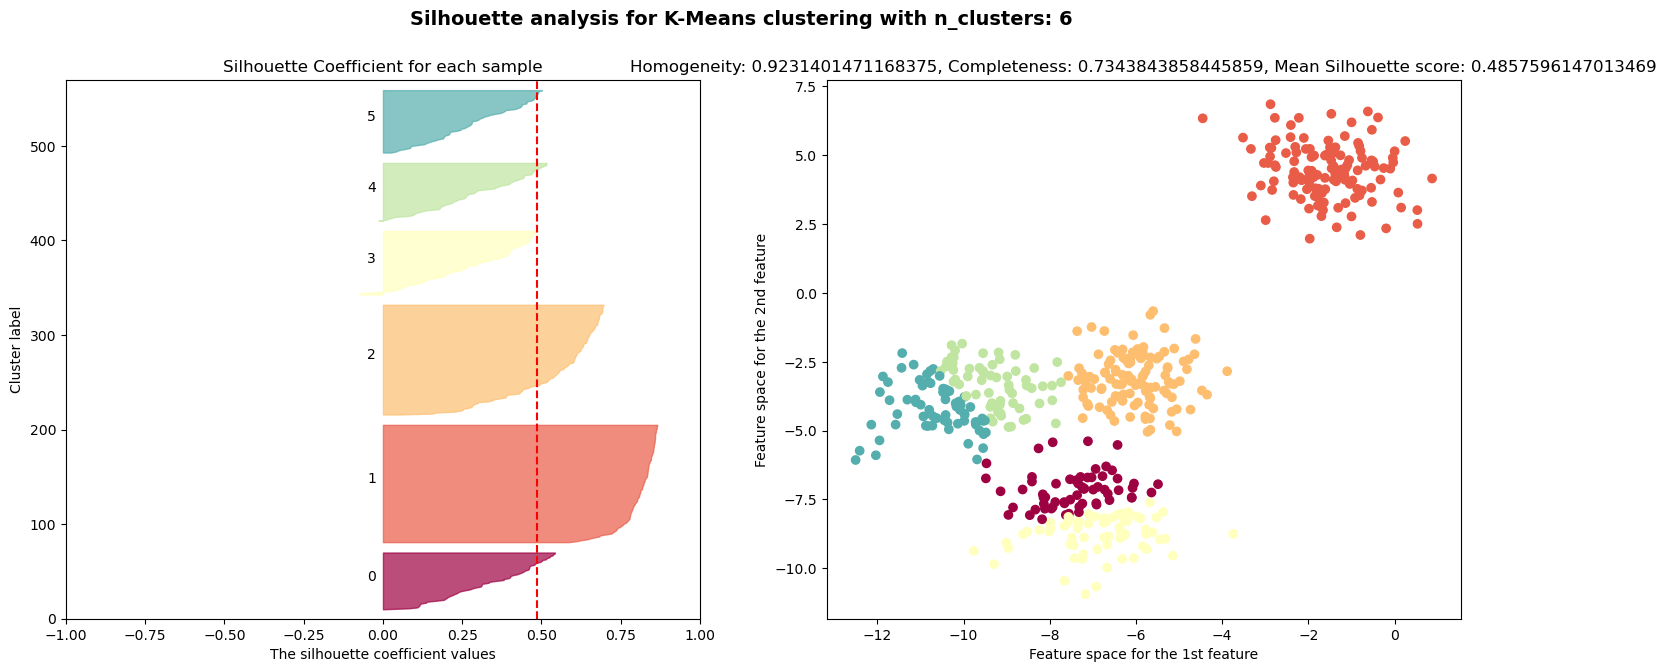

In [20]:
# Lista de número de clústeres
range_n_clusters = [2, 3, 4, 5, 6]

# Para cada número de clusters, realice un análisis de Silhouette y visualice los resultados.
for n_clusters in range_n_clusters:
    
    # Realizar k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    
    # Calcular la homogeneidad y la integridad de los clusters.
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calcular el coeficiente de coeficiente de Silhouette para cada muestra.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Calcule el coeficiente de Silhouette medio de todos los puntos de datos.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    # Para la configuración de los graficos -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Configura el gráfico.
    plt.suptitle('Silhouette analysis for K-Means clustering with n_clusters: {}'.format(n_clusters),
                 fontsize=14, fontweight='bold')
    
    # Configura el 1er subgrafico.
    ax1.set_title('Silhouette Coefficient for each sample')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Configura el 2do subgrafico.
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # Para el 1er subgráfico ------------------------------------------------------------------------------------------
    
    # Grafica el coeficiente de Silhouette para cada muestra.
    cmap = cm.get_cmap("Spectral")
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    # Trazar el coeficiente de silueta medio utilizando la línea discontinua vertical roja.
    ax1.axvline(x=s_mean, color="red", linestyle="--")
    
    # Para el 2do subgráfico ------------------------------------------------------------------------------------------
    
    # Grafica las predicciones
    colors = cmap(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

El gráfico de silueta muestra que el valor `n_clusters` de 3, 5 y 6 es una mala elección para los datos dados debido a la presencia de clústeres con puntajes de silueta por encima del promedio y también debido a las amplias fluctuaciones en el tamaño de los gráficos de silueta. El análisis de la silueta es más ambivalente al decidir entre 2 y 4.

### Problema 2: No se pueden manejar datos con ruido y valores atípicos

Incluso cuando los datos de ruido y los valores atípicos son evidentes en los resultados de agrupación (aquellos puntos que se encuentran relativamente lejos de los centroides), K-Means los incluye en las agrupaciones.

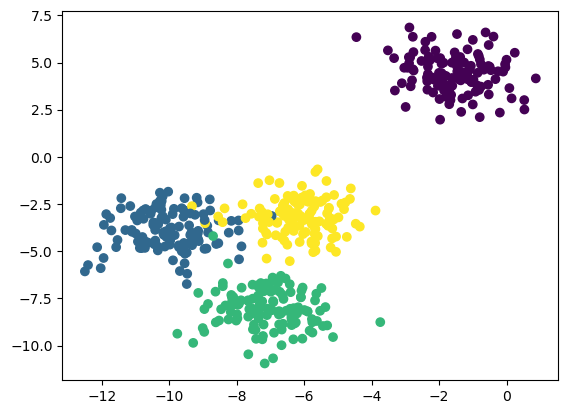

In [21]:
# Generar datos.
# Esta configuración en particular tiene un grupo distinto y 3 grupos colocados muy juntos.
# (Igual que el ejemplo anterior)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

plt.scatter(X[:,0], X[:,1], c=y)

##### Solución: Usar el umbral de distancia para detectar datos de ruido y valores atípicos

Sin embargo, podemos detectar los ruidos/valores atípicos que condicionan si la distancia entre el punto de datos $x_i$ y el centroide $c_j$ del grupo correspondiente de $x_i$ es mayor que la distancia promedio en el grupo. Es decir:

$$
\begin{equation}
  x_i=\left\{
  \begin{array}{ll}
    \text{Outlier}, & \text{if}\ D(x_i, c_j) \gt \frac{1}{\left\vert Cluster_j \right\vert} \sum_{k=0,\ k \neq i}^{\left\vert Cluster_j \right\vert}{D(x_k,c_j)} \\
    \text{Non-outlier}, & \text{otherwise}
  \end{array}\right.
  \text{where } c_j \in Cluster_j
\end{equation}
$$

Comencemos a descubrir los valores atípicos de cada grupo.

0.976087422682369
1.1917587029291217
1.0433424484088967
1.0895739683990235


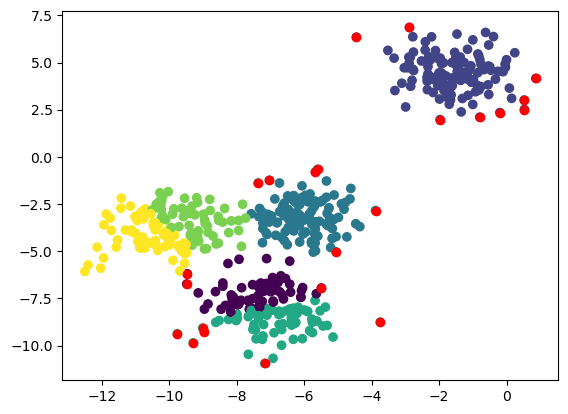

In [22]:
# Relación para nuestro umbral de distancia, controlando cuántos valores atípicos queremos detectar.
distance_threshold_ratio = 2.0

# Grafica la predición como se hace más arriba
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Para cada grupo i-ésimo, i=0~3 (tenemos 4 grupos en este ejemplo).
for i in [0, 1, 2, 3]:
    
    # Recupere el índice de los puntos de datos que pertenecen al grupo i. 
    # Nota: `np.where()` devuelve los índices en una tupla, por lo que recuperamos los índices usando `tuple[0]`
    indexs_of_X_in_ith_cluster = np.where(y_pred == i)[0]

    # Recuperar los puntos de datos por los índices
    X_in_ith_cluster = X[indexs_of_X_in_ith_cluster]
    
    # Recuperar el centroide.
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)

    # Calcule las distancias entre los puntos de datos y el centroide.
    # metrics.pairwise.euclidean_distances(X, Y) devuelve una matriz de distancias.
    # Igual que: np.sqrt(np.sum(np.square(X - Y), axis=1))
    # Nota: distances.shape = (X_in_ith_cluster.shape[0], 1). A 2-D matrix.
    distances = metrics.pairwise.euclidean_distances(X_in_ith_cluster, centroid)
    
    # Calcule la distancia media para el grupo i-ésimo como nuestro umbral de distancia.
    distance_threshold = np.mean(distances)
    print(distance_threshold)
    
    # Recuperar el índice de valores atípicos en el grupo i-ésimo 
    # Nota: distances.flatten() aplana la matriz 2-D al vector, para comparar con `distance_threshold` escalar.
    indexs_of_outlier = np.where(distances.flatten() > distance_threshold * distance_threshold_ratio)[0]
    
    # Recuperar valores atípicos en el clúster por los índices
    outliers = X_in_ith_cluster[indexs_of_outlier]
    
    # Trazar los valores atípicos en i-ésimo grupo.
    plt.scatter(outliers[:,0], outliers[:,1], c='r')

Como mencionamos sobre la medición del análisis de la calidad del clúster, puede ejecutar diferentes configuraciones de `distance_threshold_ratio` para encontrar la mejor calidad del clúster.

#### Problema 3: No se pueden manejar datos no esféricos

> *K-means* tiene como objetivo dividir n observaciones en k grupos en los que cada observación pertenece al grupo con **la media más cercana**. (Wikipedia) 

Dado que los círculos concéntricos tendrían aproximadamente la misma media, k-means no es adecuado para separarlos.

Generemos datos no esféricos y grafiquemos la distribución de los clusters.

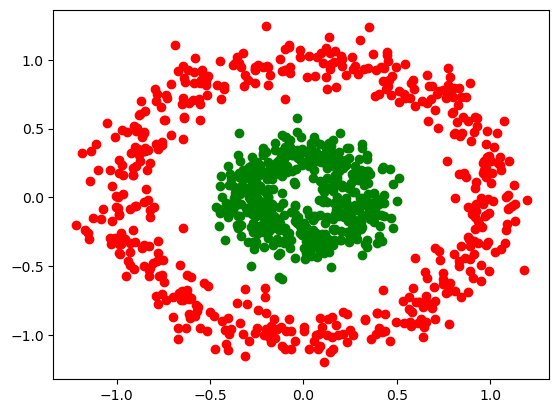

In [23]:
# Generar datos no esféricos.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Trazar la distribución de datos. (Aquí hay otra forma de trazar un gráfico de dispersión)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

Después de realizar *K-means* en datos no esféricos, el siguiente resultado muestra que no logra agrupar datos no esféricos, ya que *K-means* asume que la distribución de datos es esférica.

Homogeneity: 0.0004155959431627326
Completeness: 0.0004156391183145962
Mean Silhouette score: 0.28893210568522165


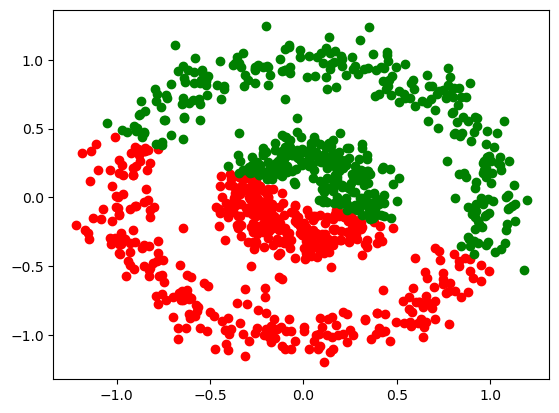

In [24]:
# Ejecutar k-means en datos no esféricos.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Graficar las predicciones.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

# Imprimir las evaluaciones
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

#### Solución: el uso de técnicas de extracción o transformación de características hace que los datos se puedan agrupar

Si sabe que sus grupos siempre serán círculos concéntricos, simplemente puede convertir sus coordenadas cartesianas (x-y) en coordenadas polares y usar solo el radio para agrupar, ya que sabe que el ángulo theta no importa.

A modo de ejemplo, convertamos las coordenadas cartesianas a polares.

In [25]:
def cart2pol(x, y):
    'Convierte coordenadas cartesianas (x-y) a polares.'
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return radius, theta

Ilustremos cómo se verían los datos convertidos a polares.

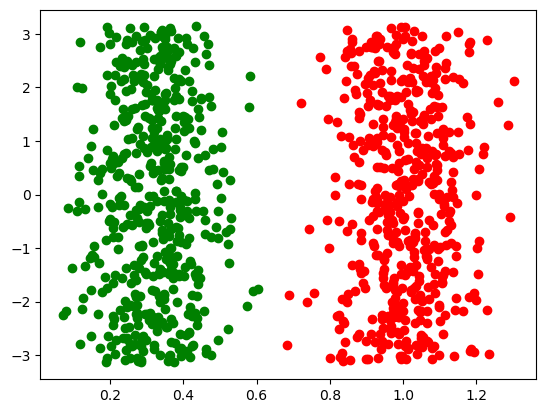

In [26]:

X_transformed = np.zeros_like(X)
X_transformed[:,0], X_transformed[:,1] = cart2pol(X[:,0], X[:,1])

plt.plot(X_transformed[y == 0, 0], X_transformed[y == 0, 1], 'ro')
plt.plot(X_transformed[y == 1, 0], X_transformed[y == 1, 1], 'go')

¡Simplemente logramos que los datos sean linealmente separables al convertir características (x-y) a (radio-theta)!

Ahora, probemos `X_transformed` con *K-means*. Para esto, solo se usará la característica de radio (por lo que la característica *theta* se igualará a 0)

In [27]:
# Solo use la característica `radius` para agrupar.
X_transformed[:,1] = np.zeros_like(X_transformed[:,1]) 
y_pred = KMeans(n_clusters=2).fit_predict(X_transformed)

Luego, grafiquemos la distribución de los datos de la predicción.

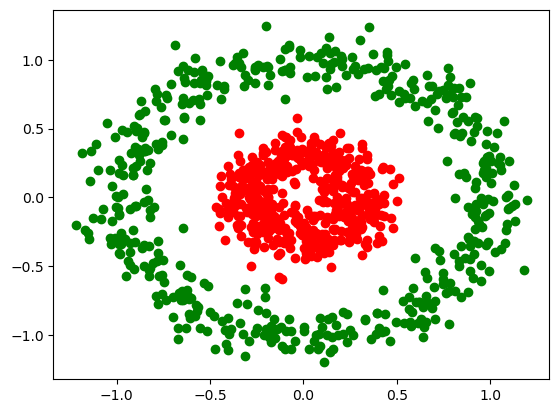

In [28]:
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

### Ejercicio 4: Aplicando DBSCAN (_Density-Based Spatial Clustering of Applications with Noise_)

El algoritmo [DBSCAN](http://scikit-learn.org/stable/modules/clustering.html#dbscan) considera los clústeres como áreas de alta densidad separadas por áreas de baja densidad.

Debido a esta vista bastante genérica, los grupos encontrados por DBSCAN pueden tener cualquier forma, a diferencia de k-means, que asume que los grupos tienen forma convexa.

El componente central del DBSCAN es el **concepto de muestras de núcleo, que son muestras que se encuentran en áreas de alta densidad**. Por lo tanto, un cluster es un conjunto de muestras centrales, cada una cerca de la otra (medida por alguna medida de distancia) y un conjunto de muestras no centrales que están cerca de una muestra central (pero que no son muestras centrales en sí mismas).


#### Parámetros
- $Eps$: Radio máximo de la vecindad.
- $MinPts$: Número mínimo de puntos en la Eps-vecindad de un punto.

#### Términos
- La vecindad Eps de un punto $q$－$N_{Eps}$: Un punto $p \in N_{Eps}(q)$ si $D(p,q) \leq Eps$. (Punto dentro del círculo).
- Valor atípico (Noise): no en un clúster.
- Punto central (Core): $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (vecindad densa).
- Punto fronterizo (Border): En clúster pero la vecindad no es densa.

<div style="text-align:center"><img width="300px" src="resources/core-border-point.png"/></div>


- Directamente alcanzable por densidad: Un punto $p$ es **directamente alcanzable por densidad** desde un punto $q$ con $Eps$ y $MinPts$ si:
    - $p \in N_{Eps}(q)$, y $q$ es un **punto central**.
    - $p$ **no** tiene que ser un punto central.

<div style="text-align:center"><img width="250px" src="resources/directly-density-reachable.png"/></div>

- Alcanzable por densidad: Un punto $p$ es **alcanzable por densidad** desde un punto $q$ con respecto a $Eps$ y $MinPts$ si hay una cadena de puntos $p_1, \dots, p_n,\ p_1 = q,\ p_n = p$ tal que $p_{i+1}$ es directamente alcanzable por densidad desde $p_i$

<div style="text-align:center"><img width="150px" src="resources/density-reachable.png"/></div>

#### El algoritmo
1. Elige aleatoriamente un punto $p$.
2. Recuperar todos los puntos de densidad alcanzable desde $p$ con respecto a $Eps$ y $MinPts$.
3. Si $p$ es un punto central, se forma un grupo.
4. Si $p$ es un punto fronterizo, no se puede alcanzar la densidad de ningún punto desde $p$, luego visite el siguiente punto.
5. Repita el proceso hasta que se hayan procesado todos los puntos de datos.

Comencemos a realizar *DBSCAN* en datos esféricos

In [29]:
# Generar los datos con 3 centros.
X, y = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=3,
                  random_state=170)

Usamos `StandardScaler` para estandarizar características a media cero y varianza unitaria.

In [30]:
X = StandardScaler().fit_transform(X)

Luego realizamos DBSCAN en los datos

In [31]:
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)

Graficamos las predicciones

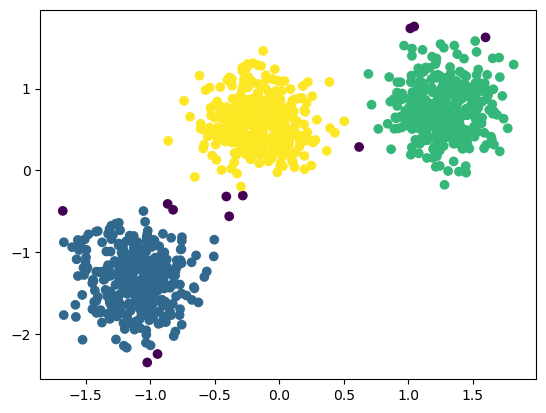

In [32]:
plt.scatter(X[:,0], X[:,1], c=y_pred)

E imprimimos las evaluaciones

In [33]:
def print_scores(X, y, y_pred):
    print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
    print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
    print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

In [34]:
print_scores(X, y, y_pred)

Number of clusters: 3
Homogeneity: 0.982039796604876
Completeness: 0.9378109619395723
Mean Silhouette score: 0.6798548805414468


Tenga en cuenta que no necesitamos especificar el número de clústeres con el algoritmo *DBSCAN*. Además, *DBSCAN* es bueno para descubrir los valores atípicos sin requerir algunos trucos como hicimos anteriormente para *K-means*.

Ahora, probemos *DBSCAN* con datos no esféricos.

In [35]:
# Generar los datos no esféricos
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

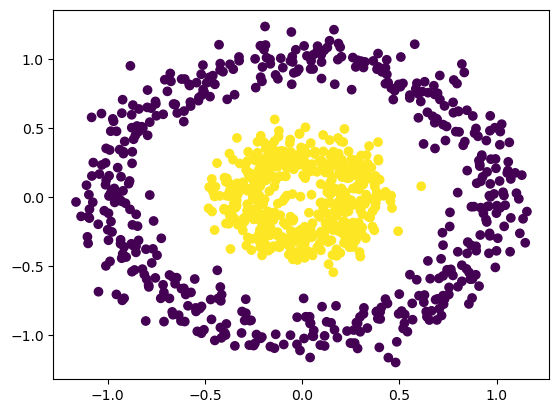

In [36]:
plt.scatter(X[:,0], X[:,1], c=y)

Luego, Usamos `StandardScaler` para estandarizar características a media cero y varianza unitaria, probamos DBSCAN en los datos y graficamos las predicciones.

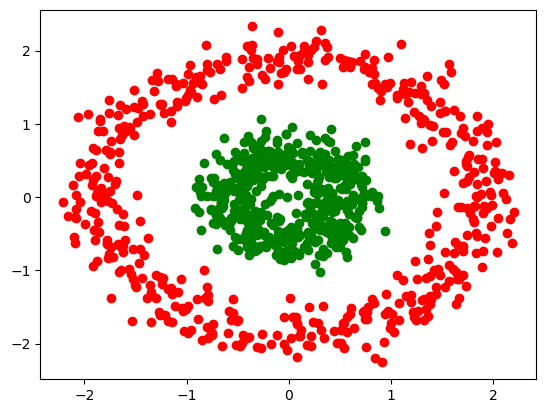

In [37]:

# Estandariza las características a media cero y una unidad de varianza.
X = StandardScaler().fit_transform(X)

# Utilice DBSCAN en los datos.
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Grafique la distribución de los datos
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')

Por último, imprimimos las evaluaciones.

In [38]:
print_scores(X, y, y_pred)

Number of clusters: 2
Homogeneity: 0.9960998654701106
Completeness: 0.9514725042796277
Mean Silhouette score: 0.18543715379857265


En comparación con *K-means*, podemos aplicar directamente *DBSCAN* en esta forma de distribución de datos debido al criterio de agrupamiento basado en la densidad.

Nota: vale la pena mencionar que la *puntuación de Silhouette* es generalmente más alta para los clústeres **convexos** que para otros conceptos de clústeres, como los clústeres basados en la densidad.

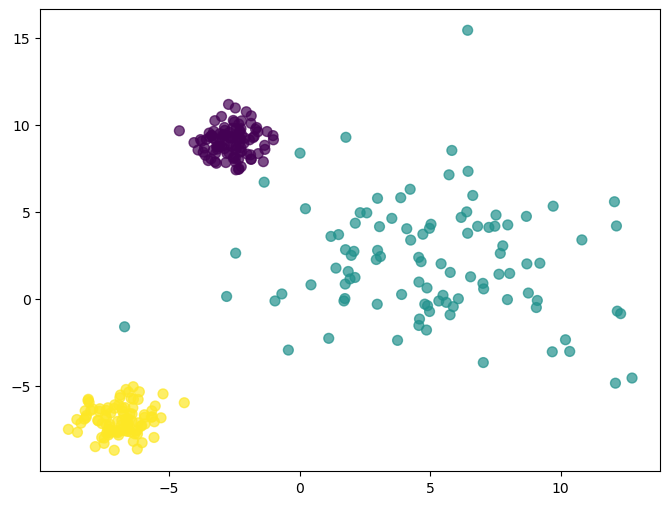

In [39]:
# Generar datos sintéticos
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.8, 3.5, 0.8], random_state=42)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show()


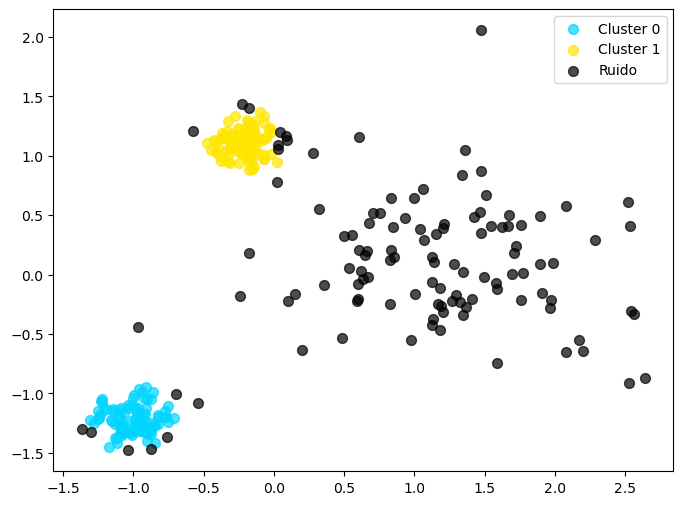

In [40]:
# Estandariza las características a media cero y una unidad de varianza.
X = StandardScaler().fit_transform(X)

# Utilice DBSCAN en los datos.
y_pred = DBSCAN(eps=0.1, min_samples=10).fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))

# Graficar los puntos con diferentes colores según los clusters
unique_labels = set(y_pred)
for label in unique_labels:
    if label == -1:  # Los puntos considerados como ruido se marcan de forma distinta
        color = 'k'  # Ruido en color negro
        label_name = 'Ruido'
    else:
        color = plt.cm.jet((label + 1) / len(unique_labels))  # Colores dinámicos
        label_name = f'Cluster {label}'
    plt.scatter(X[y_pred == label, 0], X[y_pred == label, 1], s=50, color=color, alpha=0.7, label=label_name)

plt.legend()
plt.show()

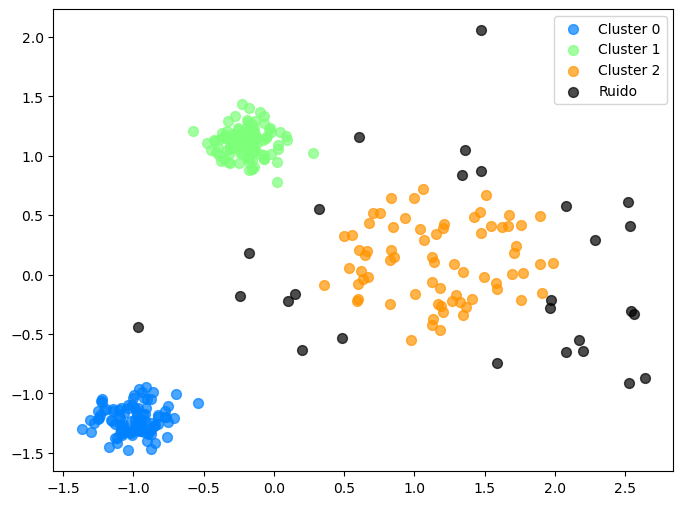

In [41]:
# Estandariza las características a media cero y una unidad de varianza.
#X = StandardScaler().fit_transform(X)

# Utilice DBSCAN en los datos.
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)


# Visualización
plt.figure(figsize=(8, 6))

# Graficar los puntos con diferentes colores según los clusters
unique_labels = set(y_pred)
for label in unique_labels:
    if label == -1:  # Los puntos considerados como ruido se marcan de forma distinta
        color = 'k'  # Ruido en color negro
        label_name = 'Ruido'
    else:
        color = plt.cm.jet((label + 1) / len(unique_labels))  # Colores dinámicos
        label_name = f'Cluster {label}'
    plt.scatter(X[y_pred == label, 0], X[y_pred == label, 1], s=50, color=color, alpha=0.7, label=label_name)

plt.legend()
plt.show()

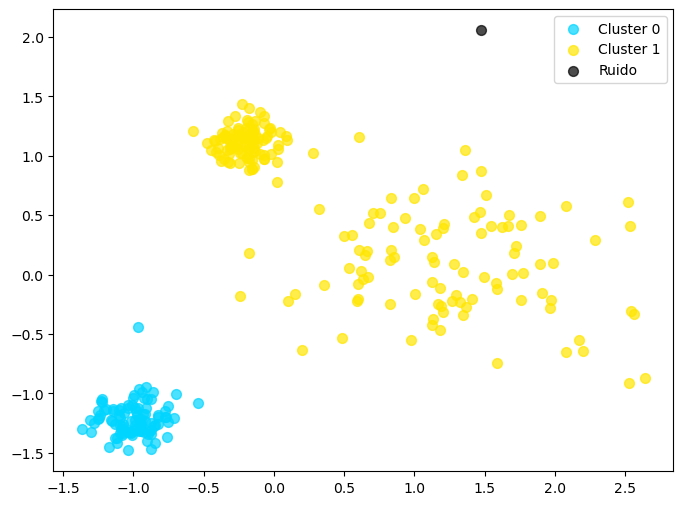

In [42]:
# Utilice DBSCAN en los datos.
y_pred = DBSCAN(eps=0.6, min_samples=10).fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))

# Graficar los puntos con diferentes colores según los clusters
unique_labels = set(y_pred)
for label in unique_labels:
    if label == -1:  # Los puntos considerados como ruido se marcan de forma distinta
        color = 'k'  # Ruido en color negro
        label_name = 'Ruido'
    else:
        color = plt.cm.jet((label + 1) / len(unique_labels))  # Colores dinámicos
        label_name = f'Cluster {label}'
    plt.scatter(X[y_pred == label, 0], X[y_pred == label, 1], s=50, color=color, alpha=0.7, label=label_name)

plt.legend()
plt.show()

HDBSCAN

### Ejercicio 4: Aplicando Clustering jerárquico

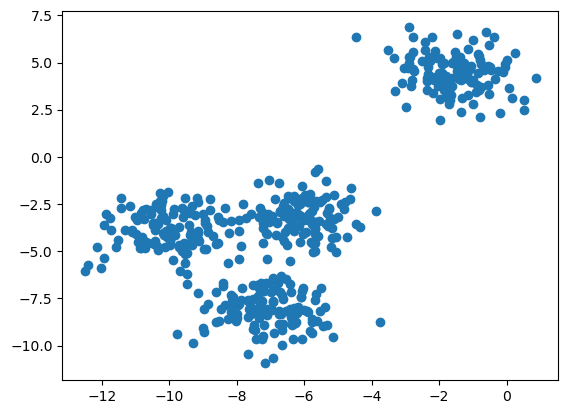

In [43]:
# Generar datos.
# Esta configuración en particular tiene un grupo distinto y 3 grupos colocados muy juntos.
# (Igual que el ejemplo anterior)
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

plt.scatter(X[:,0], X[:,1])

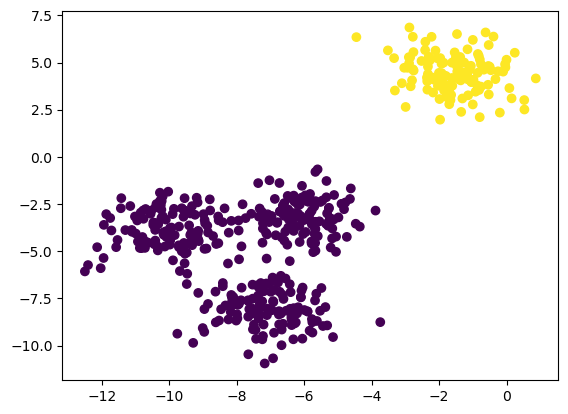

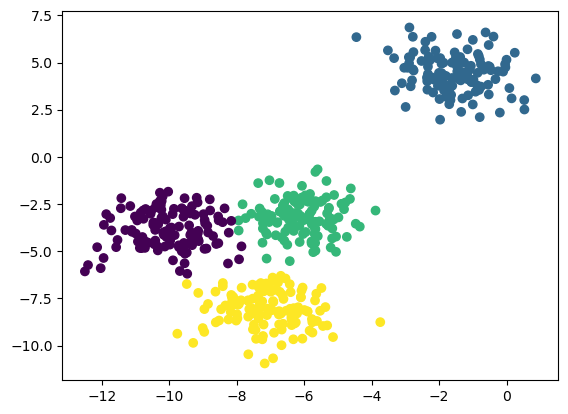

In [44]:
# Realiza k-means con n_clusters=4
kmeans = KMeans(n_clusters=2, random_state=10)
y_pred = kmeans.fit_predict(X)

# Grafica la predicción
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

# Realiza k-means con n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=10)
y_pred = kmeans.fit_predict(X)

# Grafica la predicción
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

**Dendogramas**

Un dendrograma representa visualmente el clustering jerárquico, mostrando cómo se agrupan los puntos de datos. Es como un árbol donde los puntos de datos individuales están en la parte inferior, y las ramas se fusionan a medida que forman grupos más grandes en la parte superior.

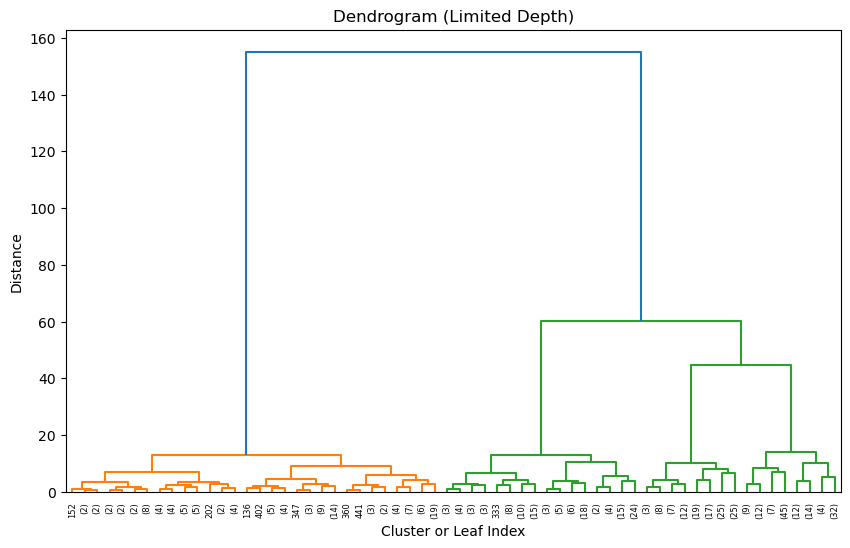

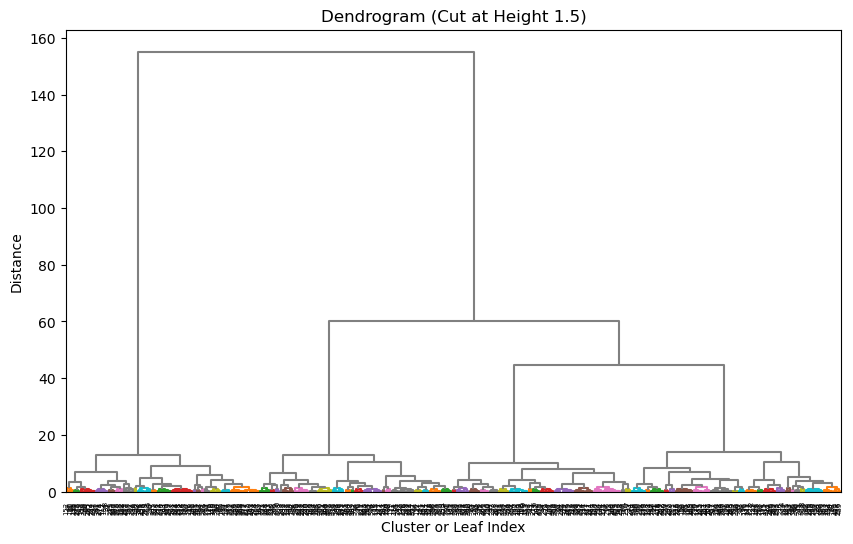

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
np.random.seed(42)
data = X 

# Step 1: Perform hierarchical clustering
Z = linkage(data, method='ward')

# Step 2: Plot the dendrogram with limited depth
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode='level',  # Limit the depth of the tree
    p=5,  # Show the top 5 levels of the dendrogram
    show_leaf_counts=True,
)
plt.title("Dendrogram (Limited Depth)")
plt.xlabel("Cluster or Leaf Index")
plt.ylabel("Distance")
plt.show()

# Step 3: Highlight major clusters by cutting at a specific height
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    color_threshold=1.5,  # Cut dendrogram at height 1.5
    above_threshold_color='grey',  # Color branches above this height
    show_leaf_counts= False,
)
plt.title("Dendrogram (Cut at Height 1.5)")
plt.xlabel("Cluster or Leaf Index")
plt.ylabel("Distance")
plt.show()


**Métodos de enlace**

Al fusionar dos clusters, verificamos la distancia entre cada par de clusters y fusionamos el par con la menor distancia/mayor similitud. Pero la pregunta es cómo se determina esa distancia. Hay diferentes formas de definir la distancia/similitud intra-cluster. Algunos de ellos son:

- **Ward** minimiza la suma de las diferencias cuadradas dentro de todos los clusters. Es un enfoque de minimización de la varianza y en este sentido es similar a la función objetivo de k-means pero abordado con un enfoque jerárquico aglomerativo.
- **Maximum** or **complete linkage** minimiza la distancia máxima entre las observaciones de pares de clusters.
- **Average linkage** minimiza el promedio de las distancias entre todas las observaciones de pares de clusters.
- **Single linkage** minimiza la distancia entre las observaciones más cercanas de pares de clusters.

<img src=resources/Distance-Matrix-in-Hierarchical--Clustering.webp style="width: 600px;"/>

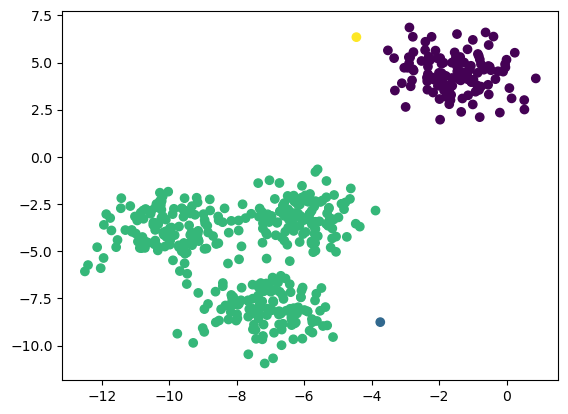

In [46]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters= 4,linkage='single')
labels = hierarchical_cluster.fit_predict(X) 

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

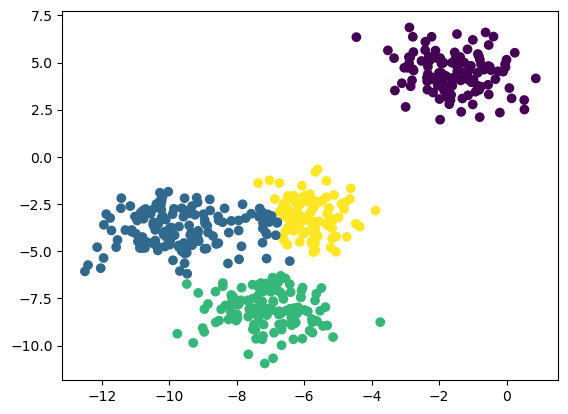

In [47]:
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters= 4,linkage='complete')
labels = hierarchical_cluster.fit_predict(X) 

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

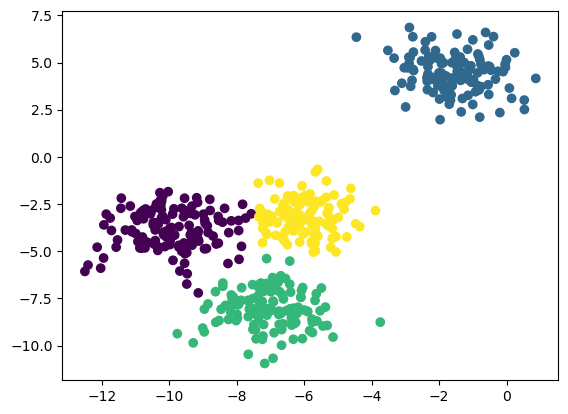

In [48]:
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters= 4,linkage='ward')
labels = hierarchical_cluster.fit_predict(X) 

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()